In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.stem import WordNetLemmatizer
import textblob
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split

In [2]:
from sklearn import metrics
import sklearn.naive_bayes as nb
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.sklearn

In [3]:
data=pd.read_excel('D:/BankReviews.xlsx')
data.head(10)

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage
5,2016-12-20,5,I had the pleasure of working with Wyndham Cap...,Wyndham Capital Mortgage
6,2017-12-17,5,My experience with Mattison was beyond greatly...,Wyndham Capital Mortgage
7,2016-08-16,5,Patrick answered all my questions by email imm...,Wyndham Capital Mortgage
8,2017-09-04,5,I loved working with this group of people! The...,Wyndham Capital Mortgage
9,2016-03-22,5,Great web interface for both the loan applicat...,Wyndham Capital Mortgage


In [4]:
# Dropping the variable which are not required
data.drop(['Date','BankName'],axis=1,inplace=True)
data.head()

,Stars,Reviews
0,5,"Great job, Wyndham Capital! Each person was pr..."
1,5,Matthew Richardson is professional and helpful...
2,5,We had a past experience with Wyndham Mortgage...
3,5,We have been dealing with Brad Thomka from the...
4,5,I can't express how grateful I am for the supp...


# Data cleaning

In [5]:
# Function for data cleaning, lowercase,removing punctuations etc
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9&%]", "", text)
    return(text)

In [6]:
# Applying the function
data1=data.Reviews.apply(lambda x: clean_text(x))

In [7]:
data1.head(10)

0    great job wyndham capital each person was prof...
1    matthew richardson is professional and helpful...
2    we had a past experience with wyndham mortgage...
3    we have been dealing with brad thomka from the...
4    i cant express how grateful i am for the suppo...
5    i had the pleasure of working with wyndham cap...
6    my experience with mattison was beyond greatly...
7    patrick answered all my questions by email imm...
8    i loved working with this group of people they...
9    great web interface for both the loan applicat...
Name: Reviews, dtype: object

In [8]:
# Concatinating the ratings and cleaned data into 1 dataframe
cleaned_data=pd.concat([data.Stars,data1],axis=1)

In [9]:
cleaned_data.head()

,Stars,Reviews
0,5,great job wyndham capital each person was prof...
1,5,matthew richardson is professional and helpful...
2,5,we had a past experience with wyndham mortgage...
3,5,we have been dealing with brad thomka from the...
4,5,i cant express how grateful i am for the suppo...


# Getting the POS tags for lemmetization

In [10]:
pos_tag=[]
for i in cleaned_data.Reviews:
    pos_tag.append(nltk.pos_tag(nltk.word_tokenize(i)))
pos_tag[:3]

[[('great', 'JJ'),
  ('job', 'NN'),
  ('wyndham', 'JJ'),
  ('capital', 'NN'),
  ('each', 'DT'),
  ('person', 'NN'),
  ('was', 'VBD'),
  ('professional', 'JJ'),
  ('and', 'CC'),
  ('helped', 'VBD'),
  ('us', 'PRP'),
  ('move', 'VB'),
  ('through', 'IN'),
  ('our', 'PRP$'),
  ('refinance', 'NN'),
  ('process', 'NN'),
  ('smoothly', 'RB'),
  ('thank', 'IN'),
  ('you', 'PRP')],
 [('matthew', 'NN'),
  ('richardson', 'NN'),
  ('is', 'VBZ'),
  ('professional', 'JJ'),
  ('and', 'CC'),
  ('helpful', 'JJ'),
  ('he', 'PRP'),
  ('helped', 'VBD'),
  ('us', 'PRP'),
  ('find', 'VB'),
  ('the', 'DT'),
  ('correct', 'JJ'),
  ('product', 'NN'),
  ('for', 'IN'),
  ('our', 'PRP$'),
  ('mortgage', 'NN'),
  ('thank', 'NN'),
  ('you', 'PRP'),
  ('very', 'RB'),
  ('much', 'RB'),
  ('for', 'IN'),
  ('the', 'DT'),
  ('excellent', 'JJ'),
  ('service', 'NN'),
  ('matthew', 'NN')],
 [('we', 'PRP'),
  ('had', 'VBD'),
  ('a', 'DT'),
  ('past', 'JJ'),
  ('experience', 'NN'),
  ('with', 'IN'),
  ('wyndham', 'JJ'),
  (

# Using the pos tags performing lemmetization

In [11]:
## Only taking nouns, adverbs, adjectives and verbs

after_lemma=[]
for i in pos_tag:
    o=[]
    for x,t in i:
        if t.startswith('NN'):
            o.append(WordNetLemmatizer().lemmatize(x,pos='n'))
        elif t.startswith('VB'):
            o.append(WordNetLemmatizer().lemmatize(x,pos='v'))
        elif t.startswith('JJ'):
            o.append(WordNetLemmatizer().lemmatize(x,pos='a'))
        elif t.startswith('RB'):
            o.append(WordNetLemmatizer().lemmatize(x,pos='r'))
    after_lemma.append(' '.join(o))
print(after_lemma[:3])      

['great job wyndham capital person be professional help move refinance process smoothly', 'matthew richardson be professional helpful help find correct product mortgage thank very much excellent service matthew', 'have past experience wyndham mortgage question use again again need wyndham go extra mile not only right wrong encounter servicer be deal previous loan pull together find viable option ultimately save money highly recommend brad thomka wyndham capital mortgage team mortgage need sincere thanks wyndham ed lind']


# Word frequency

In [12]:
# Creating a list with all words in corpus
all_words=[]
for string in after_lemma:
    y=string.split()
    for word in y:
        all_words.append(word)


    

In [13]:
# Creating a dictionary with the counts
word_freq={}
for word in all_words:
    if word in word_freq:
        word_freq[word]+=1
    else:
        word_freq[word]=1

In [14]:
sorted(word_freq.items(),key=lambda x:x[1],reverse=True)

[('be', 1607),
 ('i', 1118),
 ('have', 480),
 ('loan', 328),
 ('work', 292),
 ('more', 266),
 ('process', 261),
 ('very', 261),
 ('do', 234),
 ('not', 229),
 ('time', 221),
 ('make', 203),
 ('home', 197),
 ('read', 192),
 ('get', 182),
 ('recommend', 175),
 ('close', 165),
 ('go', 162),
 ('mortgage', 156),
 ('call', 155),
 ('rate', 144),
 ('great', 139),
 ('experience', 123),
 ('question', 118),
 ('service', 115),
 ('team', 114),
 ('company', 102),
 ('refinance', 100),
 ('email', 100),
 ('nasb', 100),
 ('best', 99),
 ('closing', 97),
 ('use', 91),
 ('lender', 91),
 ('help', 90),
 ('week', 87),
 ('always', 86),
 ('everything', 83),
 ('bank', 83),
 ('take', 81),
 ('say', 81),
 ('day', 81),
 ('so', 81),
 ('know', 79),
 ('customer', 78),
 ('first', 78),
 ('again', 77),
 ('answer', 75),
 ('easy', 74),
 ('then', 74),
 ('tell', 73),
 ('need', 72),
 ('professional', 71),
 ('anyone', 71),
 ('other', 69),
 ('only', 65),
 ('highly', 64),
 ('’', 64),
 ('never', 64),
 ('officer', 63),
 ('knowledgea

In [12]:
# Making it into series for dataframe
Reviews=pd.Series(after_lemma,name='Reviews')

In [13]:
Reviews

0      great job wyndham capital person be profession...
1      matthew richardson be professional helpful hel...
2      have past experience wyndham mortgage question...
3      have be deal brad thomka beginning start be ve...
4      i cant express grateful i be support zach prov...
                             ...                        
500    i never write review have time prevent anyone ...
501    start bob g run credit check knowledge consent...
502    horrible experience have excellent credit plen...
503    rep be extremely professional friendly helpful...
504    i be work loan consultant nasb tell give rate ...
Name: Reviews, Length: 505, dtype: object

In [14]:
# Merging the lemmetized data with the star ratings into a dataframe
final_data=pd.concat([Reviews,cleaned_data.Stars],axis=1)

In [15]:
final_data.head()

,Reviews,Stars
0,great job wyndham capital person be profession...,5
1,matthew richardson be professional helpful hel...,5
2,have past experience wyndham mortgage question...,5
3,have be deal brad thomka beginning start be ve...,5
4,i cant express grateful i be support zach prov...,5


# Sentiment analysis using textblob

In [19]:
# creating a new column with sentiment polarity
final_data['sentiment'] = final_data["Reviews"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [20]:
final_data.head()

,Reviews,Stars,sentiment
0,great job wyndham capital person be profession...,5,0.433333
1,matthew richardson be professional helpful hel...,5,0.550000
2,have past experience wyndham mortgage question...,5,0.022905
3,have be deal brad thomka beginning start be ve...,5,0.100952
4,i cant express grateful i be support zach prov...,5,0.115000


In [21]:
# clasifying into positive>0 , negative <0 or neutral=0 based on sentiment values
final_data['text_sentiment']=final_data['sentiment'].apply(lambda x:'positive' if x>0 else('negative' if x<0 else 'neutral'))

In [22]:
# dropping the sentiment column
final_data.drop(['sentiment'],axis=1,inplace=True)

In [23]:
final_data.head(10)

,Reviews,Stars,text_sentiment
0,great job wyndham capital person be profession...,5,positive
1,matthew richardson be professional helpful hel...,5,positive
2,have past experience wyndham mortgage question...,5,positive
3,have be deal brad thomka beginning start be ve...,5,positive
4,i cant express grateful i be support zach prov...,5,positive
5,i have pleasure work wyndham capital september...,5,positive
6,experience mattison be greatly professionally ...,5,positive
7,patrick answer question email immediately spen...,5,positive
8,i love work group people laugh phone always an...,5,positive
9,great web interface loan application document ...,5,positive


In [24]:
final_data.text_sentiment.value_counts()

positive    468
negative     29
neutral       8
Name: text_sentiment, dtype: int64

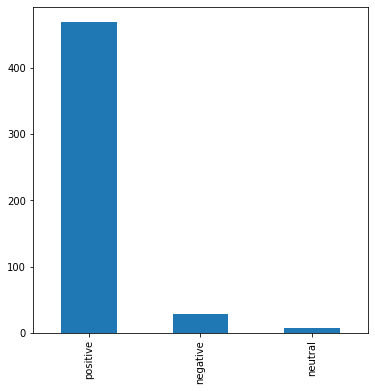

In [25]:
final_data.text_sentiment.value_counts().plot(kind='bar',figsize=(6,6))
plt.show()

# Splitting the data into train and test

In [26]:
X_train, X_test,Y_train,Y_test=train_test_split(final_data.Reviews,final_data.Stars,test_size=0.3,random_state=12)

# TF-IDF 

In [27]:
# tf-idf for unigram words
vectorizer=TfidfVectorizer(analyzer='word',ngram_range=(1,1),stop_words='english',max_df=0.9,min_df=0.001)

In [28]:
X_train_unigram=vectorizer.fit_transform(X_train)

In [29]:
X_test_unigram=vectorizer.transform(X_test)

In [30]:
# tf-idf for trigram words
vectorizer=TfidfVectorizer(analyzer='word',ngram_range=(1,3),stop_words='english',max_df=0.9,min_df=0.001)

In [31]:
X_train_trigram=vectorizer.fit_transform(X_train)

In [32]:
X_test_trigram=vectorizer.transform(X_test)

In [33]:
#tf-idf for character 
vectorizer=TfidfVectorizer(analyzer='char',ngram_range=(1,3),max_df=0.9,min_df=0.001)

In [34]:
X_train_character=vectorizer.fit_transform(X_train)

In [35]:
X_test_character=vectorizer.transform(X_test)

# Applying Naive Bayes

In [70]:
naivemodel_unigram=nb.GaussianNB()

# : for unigram

In [71]:
naivemodel_unigram.fit(X_train_unigram.toarray(),Y_train)

GaussianNB()

In [72]:
# AUC score
train_auc = metrics.roc_auc_score(Y_train, naivemodel_unigram.predict(X_train_unigram.toarray()))
test_auc = metrics.roc_auc_score(Y_test, naivemodel_unigram.predict(X_test_unigram.toarray()))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The AUC for the model built on the Train Data is :  0.9823943661971831
The AUC for the model built on the Test Data is :  0.8681318681318682


In [73]:
# Accuracy Score
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(Y_train, naivemodel_unigram.predict(X_train_unigram.toarray())))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(Y_test, naivemodel_unigram.predict(X_test_unigram.toarray())))

The overall accuracy score for the Train Data is :  0.9716713881019831
The overall accuracy score for the Test Data  is :  0.9078947368421053


# : For trigram

In [52]:
naivemodel_trigram=nb.GaussianNB()

In [53]:
naivemodel_trigram.fit(X_train_trigram.toarray(),Y_train)

GaussianNB()

In [54]:
# Auc score
train_auc = metrics.roc_auc_score(Y_train, naivemodel_trigram.predict(X_train_trigram.toarray()))
test_auc = metrics.roc_auc_score(Y_test, naivemodel_trigram.predict(X_test_trigram.toarray()))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The AUC for the model built on the Train Data is :  0.9982394366197183
The AUC for the model built on the Test Data is :  0.895909645909646


In [55]:
# accuracy score
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(Y_train, naivemodel_trigram.predict(X_train_trigram.toarray())))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(Y_test, naivemodel_trigram.predict(X_test_trigram.toarray())))

The overall accuracy score for the Train Data is :  0.9971671388101983
The overall accuracy score for the Test Data  is :  0.9539473684210527


# : For character

In [77]:
naivemodel_char=nb.GaussianNB()

In [78]:
naivemodel_char.fit(X_train_character.toarray(),Y_train)

GaussianNB()

In [79]:
train_auc = metrics.roc_auc_score(Y_train, naivemodel_char.predict(X_train_character.toarray()))
test_auc = metrics.roc_auc_score(Y_test, naivemodel_char.predict(X_test_character.toarray()))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The AUC for the model built on the Train Data is :  0.9735915492957746
The AUC for the model built on the Test Data is :  0.7872405372405372


In [80]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(Y_train, naivemodel_char.predict(X_train_character.toarray())))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(Y_test, naivemodel_char.predict(X_test_character.toarray())))

The overall accuracy score for the Train Data is :  0.9575070821529745
The overall accuracy score for the Test Data  is :  0.875


In [52]:
# Here we can see that trigram are getting higher accuracy results and less overfitting lets look at other metrics for trigram

Text(0.5, 15.0, 'Predicted label')

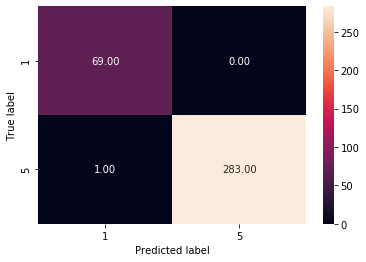

In [89]:
# For train
confu_train = metrics.confusion_matrix(Y_train,naivemodel_trigram.predict(X_train_trigram.toarray()))
sns.heatmap(confu_train, annot=True,  fmt='.2f', xticklabels = ["1", "5"] , yticklabels = ["1", "5"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

Text(0.5, 15.0, 'Predicted label')

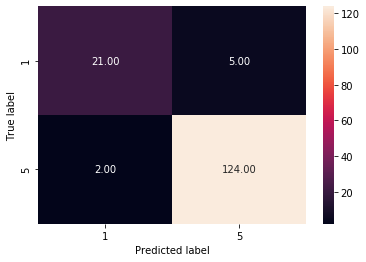

In [90]:
# For test
confu_test = metrics.confusion_matrix(Y_test,naivemodel_trigram.predict(X_test_trigram.toarray()))
sns.heatmap(confu_test, annot=True,  fmt='.2f', xticklabels = ["1", "5"] , yticklabels = ["1", "5"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [86]:
# For train
print(metrics.classification_report(Y_train,naivemodel_trigram.predict(X_train_trigram.toarray())))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99        69
           5       1.00      1.00      1.00       284

    accuracy                           1.00       353
   macro avg       0.99      1.00      1.00       353
weighted avg       1.00      1.00      1.00       353



In [87]:
# for test
print(metrics.classification_report(Y_test,naivemodel_trigram.predict(X_test_trigram.toarray())))

              precision    recall  f1-score   support

           1       0.91      0.81      0.86        26
           5       0.96      0.98      0.97       126

    accuracy                           0.95       152
   macro avg       0.94      0.90      0.91       152
weighted avg       0.95      0.95      0.95       152



# Applying SVC

#   -for unigrams

In [106]:
param_grid={'kernel':['rbf','linear'],'C':[1,5,10,20,30,40,50]}

In [107]:
svc_model=GridSearchCV(SVC(),param_grid,cv=10,verbose=5,n_jobs=-1,scoring='accuracy')

In [108]:
svc_model.fit(X_train_unigram.toarray(),Y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   11.4s finished


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 5, 10, 20, 30, 40, 50],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy', verbose=5)

In [111]:
svc_model.best_params_

{'C': 5, 'kernel': 'linear'}

In [112]:
svc_final=SVC(kernel='linear',C=5)

In [113]:
svc_final.fit(X_train_unigram.toarray(),Y_train)

SVC(C=5, kernel='linear')

In [114]:
train_auc = metrics.roc_auc_score(Y_train, svc_final.predict(X_train_unigram.toarray()))
test_auc = metrics.roc_auc_score(Y_test, svc_final.predict(X_test_unigram.toarray()))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The AUC for the model built on the Train Data is :  0.9982394366197183
The AUC for the model built on the Test Data is :  0.8766788766788767


In [115]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(Y_train, svc_final.predict(X_train_unigram.toarray())))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(Y_test,svc_final.predict(X_test_unigram.toarray())))

The overall accuracy score for the Train Data is :  0.9971671388101983
The overall accuracy score for the Test Data  is :  0.9473684210526315


#    - For Trigram

In [141]:
svc_model.fit(X_train_trigram.toarray(),Y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:  1.8min finished


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 5, 10, 20, 30, 40, 50],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy', verbose=5)

In [142]:
svc_model.best_params_

{'C': 5, 'kernel': 'linear'}

In [119]:
svc_tri=SVC(C=5,kernel='linear')

In [120]:
svc_tri.fit(X_train_trigram.toarray(),Y_train)

SVC(C=5, kernel='linear')

In [121]:
train_auc = metrics.roc_auc_score(Y_train, svc_tri.predict(X_train_trigram.toarray()))
test_auc = metrics.roc_auc_score(Y_test, svc_tri.predict(X_test_trigram.toarray()))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The AUC for the model built on the Train Data is :  0.9982394366197183
The AUC for the model built on the Test Data is :  0.895909645909646


In [122]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(Y_train, svc_tri.predict(X_train_trigram.toarray())))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(Y_test,svc_tri.predict(X_test_trigram.toarray())))

The overall accuracy score for the Train Data is :  0.9971671388101983
The overall accuracy score for the Test Data  is :  0.9539473684210527


#  -For Character

In [123]:
svc_model.fit(X_train_character,Y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    7.0s finished


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 5, 10, 20, 30, 40, 50],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy', verbose=5)

In [124]:
svc_model.best_params_

{'C': 1, 'kernel': 'linear'}

In [125]:
svc_char=SVC(C=1,kernel='linear')

In [126]:
svc_char.fit(X_train_character,Y_train)

SVC(C=1, kernel='linear')

In [136]:
train_auc = metrics.roc_auc_score(Y_train, svc_char.predict(X_train_character.toarray()))
test_auc = metrics.roc_auc_score(Y_test, svc_char.predict(X_test_character.toarray()))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The AUC for the model built on the Train Data is :  0.9837466829965298
The AUC for the model built on the Test Data is :  0.7997557997557998


In [137]:
train_auc = metrics.accuracy_score(Y_train, svc_char.predict(X_train_character.toarray()))
test_auc = metrics.accuracy_score(Y_test, svc_char.predict(X_test_character.toarray()))

print("The accuracy for the model built on the Train Data is : ", train_auc)
print("The accuracy for the model built on the Test Data is : ", test_auc)

The accuracy for the model built on the Train Data is :  0.9915014164305949
The accuracy for the model built on the Test Data is :  0.9210526315789473


In [129]:
# Here trigrams show the highest accuracy and low overfitting looking at more trigram metrics

Text(0.5, 15.0, 'Predicted label')

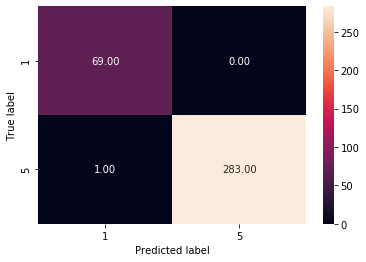

In [130]:
# For train
confu_train = metrics.confusion_matrix(Y_train,svc_tri.predict(X_train_trigram.toarray()))
sns.heatmap(confu_train, annot=True,  fmt='.2f', xticklabels = ["1", "5"] , yticklabels = ["1", "5"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

Text(0.5, 15.0, 'Predicted label')

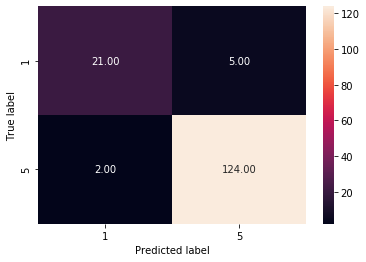

In [131]:
# For test
confu_test = metrics.confusion_matrix(Y_test,svc_tri.predict(X_test_trigram.toarray()))
sns.heatmap(confu_test, annot=True,  fmt='.2f', xticklabels = ["1", "5"] , yticklabels = ["1", "5"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [138]:
# for train
print(metrics.classification_report(Y_train,svc_tri.predict(X_train_trigram.toarray())))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99        69
           5       1.00      1.00      1.00       284

    accuracy                           1.00       353
   macro avg       0.99      1.00      1.00       353
weighted avg       1.00      1.00      1.00       353



In [140]:
# for test
print(metrics.classification_report(Y_test,svc_tri.predict(X_test_trigram.toarray())))

              precision    recall  f1-score   support

           1       0.91      0.81      0.86        26
           5       0.96      0.98      0.97       126

    accuracy                           0.95       152
   macro avg       0.94      0.90      0.91       152
weighted avg       0.95      0.95      0.95       152



# Applying ANN

In [37]:
# GRid search
param_grid={'hidden_layer_sizes': [(10,30,10),(20,),(10,5),(20,10),(20,10,5)],'activation': ['tanh', 'relu'],'solver': ['sgd', 'adam'],'alpha': 10.0 ** -np.arange(1, 10),'learning_rate': ['constant','adaptive']}

In [46]:
mlp_model=GridSearchCV(MLPClassifier(max_iter=4000),param_grid,cv=5,verbose=5,n_jobs=1)

#  - for unigram

In [47]:
# Best params
mlp_model.fit(X_train_unigram,Y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.803, total=   0.2s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.803, total=   0.2s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.803, total=   0.2s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.814, total=   0.2s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s


[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.800, total=   0.2s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.972, total=   0.6s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.915, total=   0.6s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.958, total=   0.6s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10)

[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   0.2s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.930, total=   2.9s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.814, total=   0.4s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.800, total=   0.2s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam, score=0.958,

[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.957, total=   0.7s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.929, total=   0.6s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.972, total=   3.2s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   0.2s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=consta

[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, score=0.800, total=   0.2s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.972, total=   0.3s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.915, total=   0.5s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.944, total=   0.4s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(10

[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd, score=0.803, total=   0.3s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd, score=0.803, total=   0.4s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd, score=0.814, total=   0.2s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd, score=0.800, total=   0.3s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam, sco

[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam, score=0.944, total=   1.5s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam, score=0.971, total=   0.5s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam, score=0.943, total=   0.8s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd, score=0.803, total=   0.5s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 10, 5), 

[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, score=0.803, total=   0.3s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, score=0.814, total=   0.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, score=0.800, total=   0.5s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=0.972, total=   0.5s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=0.90

[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam, score=0.914, total=   0.5s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd, score=0.803, total=   0.3s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd, score=0.803, total=   0.3s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd, score=0.803, total=   0.3s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant,

[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam, score=0.958, total=   0.9s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam, score=0.915, total=   0.7s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam, score=0.944, total=   0.6s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam, score=0.971, total=   0.8s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(

[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0.803, total=   0.5s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0.803, total=   0.5s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0.803, total=   0.5s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0.814, total=   0.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score

[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam, score=0.915, total=   0.5s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam, score=0.944, total=   0.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam, score=0.971, total=   0.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam, score=0.914, total=   0.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20, 10), learnin

[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.803, total=   0.3s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.803, total=   0.2s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.814, total=   0.2s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.800, total=   0.2s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=

[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.944, total=   0.6s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.957, total=   0.5s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.914, total=   0.5s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   0.3s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, s

[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd, score=0.800, total=   0.4s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.972, total=   0.6s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.915, total=   0.6s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.944, total=   0.5s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=ad

[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.914, total=   0.4s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, score=0.803, total=   0.2s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, score=0.803, total=   0.3s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, score=0.803, total=   0.3s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=

[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam, score=0.972, total=   0.7s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam, score=0.901, total=   0.7s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam, score=0.944, total=   0.7s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam, score=0.971, total=   0.5s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=constant, 

[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   0.3s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.814, total=   0.2s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.800, total=   0.3s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam, score=0.972, total=   0.6s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(20, 1

[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.944, total=   0.5s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.957, total=   0.4s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.900, total=   0.5s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, score=0.803, total=   0.4s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(20,), learning_r

[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd, score=0.800, total=   0.5s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam, score=0.972, total=   0.6s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam, score=0.901, total=   0.8s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam, score=0.944, total=   1.0s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, s

[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd, score=0.803, total=   0.4s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd, score=0.901, total=   3.4s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd, score=0.803, total=   0.5s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd, score=0.814, total=   0.5s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(20, 10, 

[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=0.972, total=   0.5s
[CV] activation=tanh, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=0.901, total=   0.6s
[CV] activation=tanh, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=0.944, total=   0.5s
[CV] activation=tanh, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=0.971, total=   0.5s
[CV] activation=tanh, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score

[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd, score=0.930, total=   4.0s
[CV] activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd, score=0.814, total=   0.2s
[CV] activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd, score=0.800, total=   0.3s
[CV] activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam, score=0.972, total=   0.6s
[CV] activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=consta

[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam, score=0.957, total=   0.6s
[CV] activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam, score=0.914, total=   1.3s
[CV] activation=tanh, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.803, total=   0.2s
[CV] activation=tanh, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.803, total=   0.2s
[CV] activation=tanh, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(

[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0.800, total=   0.5s
[CV] activation=tanh, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.972, total=   0.6s
[CV] activation=tanh, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.915, total=   0.6s
[CV] activation=tanh, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.944, total=   0.6s
[CV] activation=tanh, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=

[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd, score=0.803, total=   0.5s
[CV] activation=tanh, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd, score=0.803, total=   0.5s
[CV] activation=tanh, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd, score=0.814, total=   0.5s
[CV] activation=tanh, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd, score=0.800, total=   0.4s
[CV] activation=tanh, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive

[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.930, total=   0.6s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.957, total=   0.6s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.943, total=   0.6s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, score=0.803, total=   0.5s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(10, 30, 10), 

[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.800, total=   0.4s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam, score=0.972, total=   1.1s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam, score=0.915, total=   1.0s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam, score=0.958, total=   1.1s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam, score=

[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   0.2s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   1.0s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.814, total=   0.8s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.800, total=   1.2s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate

[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.944, total=   0.4s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.957, total=   0.4s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.914, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, score=0.803, total=   0.6s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20,), learning_rate=const

[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd, score=0.800, total=   0.6s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam, score=0.972, total=   0.6s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam, score=0.901, total=   0.7s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam, score=0.944, total=   0.6s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=ada

[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd, score=0.803, total=   0.7s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd, score=0.803, total=   1.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd, score=0.803, total=   0.2s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd, score=0.814, total=   0.4s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learn

[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=0.915, total=   0.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=0.944, total=   0.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=0.957, total=   0.7s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=0.929, total=   0.8s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0

[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd, score=0.814, total=   0.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd, score=0.871, total=   5.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam, score=0.972, total=   0.8s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam, score=0.859, total=   2.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=cons

[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam, score=0.929, total=   0.7s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.803, total=   0.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.803, total=   0.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.803, total=   0.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.0001, hidden_layer

[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.972, total=   0.7s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.915, total=   0.7s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.944, total=   0.7s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.971, total=   0.7s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=ad

[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd, score=0.803, total=   0.8s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd, score=0.803, total=   0.7s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd, score=0.814, total=   0.5s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd, score=0.800, total=   0.7s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate

[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.915, total=   0.4s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.944, total=   0.4s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.971, total=   0.4s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.929, total=   0.4s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-05, hidden_layer_

[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   0.3s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.814, total=   0.3s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.800, total=   0.6s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam, score=0.972, total=   0.7s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solve

[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.971, total=   0.5s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.929, total=   0.6s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   1.2s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   1.4s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(20, 10, 5), le

[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, score=0.814, total=   1.1s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, score=0.800, total=   0.8s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.972, total=   0.6s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.915, total=   0.5s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-06, hidden_layer_si

[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd, score=0.803, total=   0.7s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd, score=0.803, total=   0.9s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd, score=0.803, total=   0.6s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd, score=0.814, total=   0.4s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=s

[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam, score=0.901, total=   0.7s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam, score=0.859, total=   1.0s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam, score=0.871, total=   1.6s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam, score=0.929, total=   0.6s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(2

[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, score=0.803, total=   0.7s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, score=0.803, total=   0.7s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, score=0.814, total=   0.6s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, score=0.800, total=   0.6s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=0.972,

[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam, score=0.971, total=   0.8s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam, score=0.914, total=   0.6s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd, score=0.803, total=   0.9s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd, score=0.803, total=   0.5s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10), learning_rate=constant,

[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd, score=0.800, total=   0.5s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam, score=0.944, total=   2.3s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam, score=0.915, total=   0.7s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam, score=0.944, total=   0.7s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(2

[CV]  activation=relu, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0.803, total=   0.8s
[CV] activation=relu, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0.803, total=   0.7s
[CV] activation=relu, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0.803, total=   1.0s
[CV] activation=relu, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0.814, total=   0.8s
[CV] activation=relu, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0.800, t

[CV]  activation=relu, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam, score=0.944, total=   0.6s
[CV] activation=relu, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam, score=0.971, total=   0.7s
[CV] activation=relu, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam, score=0.914, total=   0.7s
[CV] activation=relu, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd, score=0.803, total=   1.0s
[CV] activation=relu, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=adap

[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.814, total=   0.5s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.800, total=   0.7s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.972, total=   0.5s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.915, total=   0.7s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-09, hidden_layer_si

[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.914, total=   0.7s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   0.3s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   0.6s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   0.3s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sg

[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.958, total=   0.7s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.901, total=   0.9s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.944, total=   0.7s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.971, total=   0.8s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=a

[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed: 23.7min finished


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=4000), n_jobs=1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]),
                         'hidden_layer_sizes': [(10, 30, 10), (20,), (10, 5),
                                                (20, 10), (20, 10, 5)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             verbose=5)

In [49]:
mlp_model.best_params_

{'activation': 'relu',
 'alpha': 0.1,
 'hidden_layer_sizes': (10, 30, 10),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [47]:
# fitting the model with best params
ann_unigram=MLPClassifier(activation='relu',alpha=0.1,hidden_layer_sizes=(10,30,10),learning_rate='adaptive',solver='adam',max_iter=1200)

In [48]:
ann_unigram.fit(X_train_unigram,Y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=(10, 30, 10),
              learning_rate='adaptive', max_iter=1200)

In [49]:
train_auc = metrics.roc_auc_score(Y_train, ann_unigram.predict(X_train_unigram))
test_auc = metrics.roc_auc_score(Y_test, ann_unigram.predict(X_test_unigram))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The AUC for the model built on the Train Data is :  0.9982394366197183
The AUC for the model built on the Test Data is :  0.8998778998778999


In [50]:
train_auc = metrics.accuracy_score(Y_train, ann_unigram.predict(X_train_unigram))
test_auc = metrics.accuracy_score(Y_test, ann_unigram.predict(X_test_unigram))

print("The Accuracy for the model built on the Train Data is : ", train_auc)
print("The Accuracy for the model built on the Test Data is : ", test_auc)

The Accuracy for the model built on the Train Data is :  0.9971671388101983
The Accuracy for the model built on the Test Data is :  0.9605263157894737


#  -for trigram

In [59]:
mlp_model1=GridSearchCV(MLPClassifier(max_iter=4000),param_grid,cv=5,verbose=5,n_jobs=1)

In [60]:
mlp_model1.fit(X_train_trigram,Y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.803, total=   1.6s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.803, total=   1.2s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.803, total=   1.3s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.0s remaining:    0.0s


[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.814, total=   1.4s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.4s remaining:    0.0s


[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.800, total=   0.9s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.901, total=   7.0s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.859, total=   3.5s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.859, total=   4.9s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10)

[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   3.2s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   3.6s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.814, total=   2.8s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.800, total=   2.9s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam, score=0.901,

[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.871, total=  22.2s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.857, total=  16.7s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   6.4s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   4.0s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=consta

[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, score=0.800, total=   1.7s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.901, total=   4.3s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.859, total=   5.7s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.859, total=   8.1s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(10

[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd, score=0.803, total=   2.8s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd, score=0.803, total=   2.1s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd, score=0.814, total=   2.4s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd, score=0.800, total=   3.6s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam, sco

[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam, score=0.859, total=  17.0s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam, score=0.871, total=  10.0s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam, score=0.829, total=   7.0s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd, score=0.803, total=   6.8s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 10, 5), 

[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, score=0.803, total=   4.7s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, score=0.814, total=   5.1s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, score=0.800, total=   5.9s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=0.901, total=   8.8s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=0.85

[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam, score=0.857, total=   3.5s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd, score=0.803, total=   3.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd, score=0.803, total=   3.8s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd, score=0.803, total=   3.3s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant,

[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam, score=0.901, total=   9.8s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam, score=0.859, total=  16.7s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam, score=0.859, total=  11.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam, score=0.871, total=   8.8s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(

[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0.803, total=   7.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0.803, total=   7.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0.803, total=   7.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0.814, total=   7.0s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score

[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam, score=0.859, total=  13.6s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam, score=0.859, total=   9.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam, score=0.871, total=   6.0s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam, score=0.843, total=   7.8s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20, 10), learnin

[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.803, total=   1.1s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.803, total=   1.8s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.814, total=   1.1s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.800, total=   0.6s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=

[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.859, total=   8.0s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.871, total=   7.6s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.843, total=   7.6s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   2.3s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, s

[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd, score=0.800, total=   4.8s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.901, total=   8.7s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.859, total=   8.5s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.859, total=  15.9s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=ad

[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.843, total=   2.8s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, score=0.803, total=   2.1s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, score=0.803, total=   2.5s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, score=0.803, total=   2.2s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=

[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam, score=0.930, total=   5.7s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam, score=0.859, total=   8.2s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam, score=0.859, total=   5.5s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam, score=0.871, total=   7.6s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=constant, 

[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   2.2s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   0.4s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.814, total=   3.5s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.800, total=   2.8s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(20, 10,

[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.859, total=   6.9s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.859, total=   3.7s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.900, total=   2.5s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.829, total=   2.5s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(

[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd, score=0.814, total=   2.6s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd, score=0.800, total=   2.8s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam, score=0.901, total=   9.9s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam, score=0.859, total=   9.9s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, sol

[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam, score=0.857, total=  12.2s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd, score=0.803, total=   3.7s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd, score=0.803, total=   4.5s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd, score=0.803, total=   4.2s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(20, 10,

[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, score=0.800, total=   7.3s
[CV] activation=tanh, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=0.901, total=   9.5s
[CV] activation=tanh, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=0.859, total=   8.8s
[CV] activation=tanh, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=0.859, total=   9.6s
[CV] activation=tanh, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=

[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd, score=0.803, total=   5.1s
[CV] activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd, score=0.803, total=   4.8s
[CV] activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd, score=0.814, total=   5.1s
[CV] activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd, score=0.800, total=   4.6s
[CV] activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant

[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam, score=0.901, total=  20.2s
[CV] activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam, score=0.871, total=  17.0s
[CV] activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam, score=0.843, total=  18.0s
[CV] activation=tanh, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.803, total=   1.4s
[CV] activation=tanh, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(

[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0.814, total=   6.8s
[CV] activation=tanh, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0.800, total=   7.6s
[CV] activation=tanh, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.901, total=   9.3s
[CV] activation=tanh, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.859, total=   8.8s
[CV] activation=tanh, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.

[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd, score=0.803, total=   4.7s
[CV] activation=tanh, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd, score=0.803, total=   5.5s
[CV] activation=tanh, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd, score=0.803, total=   4.9s
[CV] activation=tanh, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd, score=0.814, total=   5.5s
[CV] activation=tanh, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive,

[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.859, total=   6.6s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.873, total=   6.1s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.871, total=   4.2s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.857, total=   5.2s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(10, 30, 10)

[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.814, total=   1.7s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.800, total=   1.8s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam, score=0.901, total=  16.8s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam, score=0.859, total=  12.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam, score=0.

[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   4.2s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   3.0s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   3.1s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.814, total=   3.4s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=

[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.859, total=   5.6s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.887, total=   3.8s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.871, total=   3.0s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.843, total=   3.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20,), lea

[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd, score=0.814, total=   6.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd, score=0.800, total=   4.9s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam, score=0.901, total=   8.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam, score=0.859, total=   6.2s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam,

[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam, score=0.900, total=  11.4s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd, score=0.803, total=   6.8s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd, score=0.803, total=   2.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd, score=0.803, total=  11.6s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10, 5), lear

[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=0.944, total=   9.7s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=0.887, total=  10.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=0.859, total=   9.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=0.886, total=   8.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score

[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd, score=0.803, total=   5.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd, score=0.814, total=   6.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd, score=0.800, total=   4.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam, score=0.901, total=   7.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=consta

[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam, score=0.900, total=   8.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam, score=0.843, total=   6.7s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.803, total=   2.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.803, total=   2.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.0001, hidden_layer_s

[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0.800, total=   8.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.930, total=  10.6s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.887, total=  10.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.887, total=   9.6s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=ada

[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd, score=0.803, total=   6.5s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd, score=0.803, total=   7.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd, score=0.803, total=   6.7s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd, score=0.814, total=   5.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=

[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.901, total=   3.0s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.859, total=   3.7s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.887, total=   3.9s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.871, total=   2.9s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-05, hidden_layer

[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.859, total=  28.1s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   2.7s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.814, total=   1.8s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.800, total=   4.3s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=

[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.901, total=   7.7s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.914, total=   5.9s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.843, total=   7.4s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.803, total=  12.3s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(20, 10, 5), learni

[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, score=0.803, total=   3.3s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, score=0.814, total=   3.6s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, score=0.800, total=   3.5s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.901, total=   4.0s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-06, hidden_layer_size

[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam, score=0.829, total=  11.6s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd, score=0.803, total=   5.7s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd, score=0.803, total=   4.5s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd, score=0.803, total=   4.8s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=

[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam, score=0.901, total=   9.2s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam, score=0.859, total=   6.5s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam, score=0.845, total=  30.8s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam, score=0.871, total=  14.7s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(

[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, score=0.803, total=   6.6s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, score=0.803, total=   7.2s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, score=0.803, total=   6.8s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, score=0.814, total=   7.6s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, score=0.800, t

[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam, score=0.859, total=   5.0s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam, score=0.914, total=   5.8s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam, score=0.843, total=   5.0s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd, score=0.803, total=   6.0s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10), learning_rate=constant,

[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd, score=0.814, total=   5.8s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd, score=0.800, total=   5.7s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam, score=0.901, total=  11.0s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam, score=0.859, total=   7.1s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20,

[CV]  activation=relu, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=0.843, total=   8.5s
[CV] activation=relu, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0.803, total=   8.5s
[CV] activation=relu, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0.803, total=   8.4s
[CV] activation=relu, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0.803, total=   8.5s
[CV] activation=relu, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0.814, 

[CV]  activation=relu, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam, score=0.859, total=   9.5s
[CV] activation=relu, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam, score=0.859, total=   7.8s
[CV] activation=relu, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam, score=0.971, total=   7.8s
[CV] activation=relu, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam, score=0.843, total=   6.0s
[CV] activation=relu, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=ad

[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.803, total=   1.6s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.814, total=   2.3s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.800, total=   1.9s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.901, total=   3.6s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-09, hidden_layer_size

[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.929, total=   8.5s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.843, total=   7.9s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   3.4s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   2.0s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd,

[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.930, total=   8.0s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.859, total=   8.4s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.887, total=   9.1s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.900, total=   5.7s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=a

[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed: 227.1min finished


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=4000), n_jobs=1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]),
                         'hidden_layer_sizes': [(10, 30, 10), (20,), (10, 5),
                                                (20, 10), (20, 10, 5)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             verbose=5)

In [123]:
mlp_model1.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (10, 5),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [136]:
ann_trigram=MLPClassifier(activation='relu',alpha=0.0001,hidden_layer_sizes=(10,5),learning_rate='adaptive',solver='adam',max_iter=800)

In [137]:
ann_trigram.fit(X_train_trigram,Y_train)

MLPClassifier(hidden_layer_sizes=(10, 5), learning_rate='adaptive',
              max_iter=800)

In [138]:
train_auc = metrics.roc_auc_score(Y_train, ann_trigram.predict(X_train_trigram))
test_auc = metrics.roc_auc_score(Y_test, ann_trigram.predict(X_test_trigram))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The AUC for the model built on the Train Data is :  0.9982394366197183
The AUC for the model built on the Test Data is :  0.8461538461538461


In [139]:
train_auc = metrics.accuracy_score(Y_train, ann_trigram.predict(X_train_trigram))
test_auc = metrics.accuracy_score(Y_test, ann_trigram.predict(X_test_trigram))

print("The Accuracy for the model built on the Train Data is : ", train_auc)
print("The Accuracy for the model built on the Test Data is : ", test_auc)

The Accuracy for the model built on the Train Data is :  0.9971671388101983
The Accuracy for the model built on the Test Data is :  0.9473684210526315


#   -For character

In [38]:
mlp_model2=GridSearchCV(MLPClassifier(max_iter=4000),param_grid,cv=5,verbose=5,n_jobs=1)

In [141]:
mlp_model2.fit(X_train_character,Y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.803, total=   0.3s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.803, total=   0.6s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.803, total=   0.3s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s


[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.814, total=   0.3s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s


[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.800, total=   0.3s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.972, total=   1.3s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.930, total=   1.4s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.944, total=   0.7s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 30, 10)

[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   0.4s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.958, total=   5.8s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.814, total=   0.4s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.800, total=   0.6s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam, score=0.986,

[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.971, total=   1.5s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.957, total=   1.4s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   0.7s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   0.8s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=consta

[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, score=0.800, total=   0.7s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.986, total=   0.6s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.944, total=   1.0s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.958, total=   0.9s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(10

[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd, score=0.915, total=   6.1s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd, score=0.803, total=   0.7s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd, score=0.814, total=   0.7s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd, score=0.800, total=   0.8s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam, sco

[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam, score=0.958, total=   3.4s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam, score=0.957, total=   2.4s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam, score=0.929, total=   1.4s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd, score=0.803, total=   1.0s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(20, 10, 5), 

[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, score=0.803, total=   1.0s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, score=0.814, total=   1.1s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, score=0.800, total=   1.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=0.986, total=   1.3s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=0.97

[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam, score=0.914, total=   1.1s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd, score=0.803, total=   0.8s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd, score=0.915, total=   9.1s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd, score=0.803, total=   0.9s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant,

[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam, score=0.986, total=   1.6s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam, score=0.930, total=   2.6s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam, score=0.958, total=   2.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam, score=0.971, total=   1.9s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(

[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0.803, total=   1.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0.901, total=  12.9s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0.901, total=  12.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0.814, total=   1.5s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score

[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam, score=0.972, total=   1.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam, score=0.930, total=   1.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam, score=0.971, total=   1.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam, score=0.929, total=   1.1s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20, 10), learnin

[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.803, total=   0.5s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.803, total=   0.3s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.814, total=   0.4s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.800, total=   0.3s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=

[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.930, total=   1.3s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.971, total=   1.1s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.929, total=   1.1s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.972, total=   5.6s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, s

[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd, score=0.800, total=   1.0s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.986, total=   1.5s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.944, total=   1.1s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.930, total=   1.1s
[CV] activation=tanh, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=ad

[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.929, total=   0.7s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, score=0.803, total=   0.6s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, score=0.803, total=   0.6s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, score=0.803, total=   0.5s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=

[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam, score=0.986, total=   1.1s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam, score=0.972, total=   1.2s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam, score=0.930, total=   1.4s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam, score=0.971, total=   0.9s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=constant, 

[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.915, total=   6.3s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   0.7s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.814, total=   0.6s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.800, total=   0.9s
[CV] activation=tanh, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-06, hidden_layer_sizes=(20, 10,

[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.944, total=   1.1s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.930, total=   0.9s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.971, total=   0.4s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.929, total=   0.6s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(

[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd, score=0.814, total=   0.6s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd, score=0.800, total=   0.7s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam, score=0.986, total=   1.6s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam, score=0.901, total=   0.9s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, sol

[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam, score=0.929, total=   1.2s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd, score=0.972, total=   8.5s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd, score=0.803, total=   0.9s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd, score=0.803, total=   1.0s
[CV] activation=tanh, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-07, hidden_layer_sizes=(20, 10,

[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, score=0.800, total=   1.3s
[CV] activation=tanh, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=0.986, total=   1.2s
[CV] activation=tanh, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=0.972, total=   1.3s
[CV] activation=tanh, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=0.930, total=   1.2s
[CV] activation=tanh, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=

[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd, score=0.803, total=   0.9s
[CV] activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd, score=0.958, total=   8.1s
[CV] activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd, score=0.814, total=   1.0s
[CV] activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd, score=0.800, total=   0.7s
[CV] activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant

[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam, score=0.915, total=   2.8s
[CV] activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam, score=0.971, total=   1.2s
[CV] activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-08, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam, score=0.943, total=   2.7s
[CV] activation=tanh, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.803, total=   0.4s
[CV] activation=tanh, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(

[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0.814, total=   1.4s
[CV] activation=tanh, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0.886, total=  12.3s
[CV] activation=tanh, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.972, total=   1.3s
[CV] activation=tanh, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.972, total=   1.3s
[CV] activation=tanh, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.

[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd, score=0.803, total=   1.0s
[CV] activation=tanh, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd, score=0.803, total=   1.2s
[CV] activation=tanh, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd, score=0.803, total=   1.0s
[CV] activation=tanh, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd, score=0.814, total=   1.0s
[CV] activation=tanh, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive,

[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.930, total=   1.8s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.958, total=   1.5s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.957, total=   1.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.957, total=   0.9s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(10, 30, 10)

[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.814, total=   0.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.800, total=   0.7s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam, score=0.986, total=   2.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam, score=0.930, total=   1.9s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam, score=0.

[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   1.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   1.1s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   0.8s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.814, total=   0.8s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 10, 5), learning_rate=

[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.915, total=   0.9s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.930, total=   0.8s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.971, total=   0.6s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.929, total=   0.6s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20,), lea

[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd, score=0.814, total=   0.8s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd, score=0.800, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam, score=0.958, total=   2.6s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam, score=0.887, total=   2.2s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam,

[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam, score=0.957, total=   1.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd, score=0.803, total=   2.7s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd, score=0.803, total=   2.4s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd, score=0.803, total=   1.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 10, 5), lear

[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=0.986, total=   1.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=0.972, total=   1.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=0.930, total=   1.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=0.971, total=   1.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score

[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd, score=0.803, total=   1.0s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd, score=0.814, total=   2.0s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd, score=0.800, total=   0.9s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam, score=0.986, total=   1.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10), learning_rate=consta

[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam, score=0.957, total=   1.9s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam, score=0.843, total=   2.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.803, total=   0.6s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.803, total=   0.8s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.0001, hidden_layer_s

[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0.800, total=   1.7s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.986, total=   1.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.958, total=   1.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.930, total=   1.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=ada

[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd, score=0.803, total=   1.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd, score=0.803, total=   1.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd, score=0.803, total=   0.9s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd, score=0.814, total=   1.5s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20, 10), learning_rate=

[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.972, total=   0.8s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.958, total=   0.9s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.930, total=   0.7s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.971, total=   0.7s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-05, hidden_layer

[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   0.7s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   0.7s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.814, total=   1.5s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.800, total=   0.5s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=

[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.944, total=   1.3s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.971, total=   1.0s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.929, total=   1.2s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   0.6s
[CV] activation=relu, alpha=1e-05, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-05, hidden_layer_sizes=(20, 10, 5), learni

[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, score=0.803, total=   0.8s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, score=0.814, total=   0.6s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, score=0.800, total=   0.9s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, score=0.986, total=   0.8s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-06, hidden_layer_size

[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=adam, score=0.929, total=   0.9s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd, score=0.803, total=   1.1s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd, score=0.915, total=   5.3s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd, score=0.803, total=   1.4s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=

[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam, score=0.944, total=   3.6s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam, score=0.958, total=   1.5s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam, score=0.901, total=   3.8s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam, score=0.814, total=   0.7s
[CV] activation=relu, alpha=1e-06, hidden_layer_sizes=(20, 10, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-06, hidden_layer_sizes=(

[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, score=0.803, total=   1.2s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, score=0.803, total=   1.3s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, score=0.803, total=   1.2s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, score=0.814, total=   1.1s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, score=0.800, t

[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam, score=0.944, total=   5.6s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam, score=0.971, total=   0.9s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(10, 5), learning_rate=adaptive, solver=adam, score=0.943, total=   0.9s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd, score=0.803, total=   0.6s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10), learning_rate=constant,

[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd, score=0.814, total=   1.4s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=sgd, score=0.800, total=   0.4s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam, score=0.986, total=   1.5s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam, score=0.859, total=   4.8s
[CV] activation=relu, alpha=1e-07, hidden_layer_sizes=(20, 10, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-07, hidden_layer_sizes=(20,

[CV]  activation=relu, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, score=0.943, total=   1.4s
[CV] activation=relu, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0.803, total=   1.4s
[CV] activation=relu, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0.803, total=   1.6s
[CV] activation=relu, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0.803, total=   1.9s
[CV] activation=relu, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-08, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, score=0.814, 

[CV]  activation=relu, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam, score=0.958, total=   1.0s
[CV] activation=relu, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam, score=0.944, total=   1.3s
[CV] activation=relu, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam, score=0.971, total=   0.9s
[CV] activation=relu, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=constant, solver=adam, score=0.929, total=   0.9s
[CV] activation=relu, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=1e-08, hidden_layer_sizes=(20, 10), learning_rate=ad

[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.803, total=   0.5s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.814, total=   0.6s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, score=0.800, total=   0.8s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, score=0.972, total=   0.8s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=1e-09, hidden_layer_size

[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.971, total=   1.5s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, score=0.929, total=   1.1s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   0.2s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd, score=0.803, total=   1.1s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(10, 5), learning_rate=constant, solver=sgd,

[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.986, total=   1.1s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.972, total=   1.5s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.930, total=   1.3s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam, score=0.971, total=   1.0s
[CV] activation=relu, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=1e-09, hidden_layer_sizes=(20, 10), learning_rate=a

[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed: 48.9min finished


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=4000), n_jobs=1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]),
                         'hidden_layer_sizes': [(10, 30, 10), (20,), (10, 5),
                                                (20, 10), (20, 10, 5)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             verbose=5)

In [142]:
mlp_model2.best_params_

{'activation': 'relu',
 'alpha': 0.01,
 'hidden_layer_sizes': (20, 10),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [39]:
ann_char=MLPClassifier(activation='relu',alpha=0.01,hidden_layer_sizes=(20,10),learning_rate='adaptive',solver='adam',max_iter=800)

In [41]:
ann_char.fit(X_train_character,Y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(20, 10), learning_rate='adaptive',
              max_iter=800)

In [42]:
train_auc = metrics.roc_auc_score(Y_train, ann_char.predict(X_train_character))
test_auc = metrics.roc_auc_score(Y_test, ann_char.predict(X_test_character))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The AUC for the model built on the Train Data is :  0.9927536231884059
The AUC for the model built on the Test Data is :  0.8806471306471306


In [43]:
train_auc = metrics.accuracy_score(Y_train, ann_char.predict(X_train_character))
test_auc = metrics.accuracy_score(Y_test, ann_char.predict(X_test_character))

print("The Accuracy for the model built on the Train Data is : ", train_auc)
print("The Accuracy for the model built on the Test Data is : ", test_auc)

The Accuracy for the model built on the Train Data is :  0.9971671388101983
The Accuracy for the model built on the Test Data is :  0.9539473684210527


In [44]:
# Here Unigrams show the highest accuracy there taking further metrics

Text(0.5, 15.0, 'Predicted label')

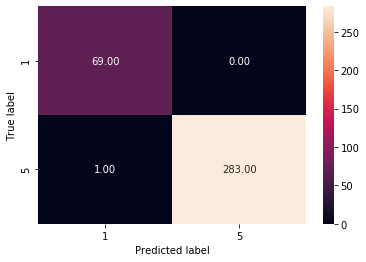

In [51]:
# for train
confu_train = metrics.confusion_matrix(Y_train,ann_unigram.predict(X_train_unigram))
sns.heatmap(confu_train, annot=True,  fmt='.2f', xticklabels = ["1", "5"] , yticklabels = ["1", "5"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

Text(0.5, 15.0, 'Predicted label')

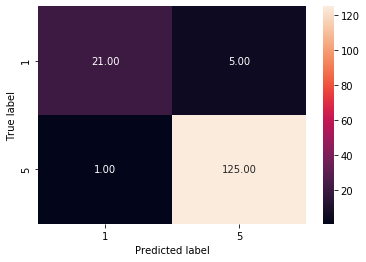

In [52]:
# for test
confu_test = metrics.confusion_matrix(Y_test,ann_unigram.predict(X_test_unigram))
sns.heatmap(confu_test, annot=True,  fmt='.2f', xticklabels = ["1", "5"] , yticklabels = ["1", "5"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [53]:
# for train
print(metrics.classification_report(Y_train,ann_unigram.predict(X_train_unigram)))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99        69
           5       1.00      1.00      1.00       284

    accuracy                           1.00       353
   macro avg       0.99      1.00      1.00       353
weighted avg       1.00      1.00      1.00       353



In [54]:
# for test
print(metrics.classification_report(Y_test,ann_unigram.predict(X_test_unigram)))

              precision    recall  f1-score   support

           1       0.95      0.81      0.88        26
           5       0.96      0.99      0.98       126

    accuracy                           0.96       152
   macro avg       0.96      0.90      0.93       152
weighted avg       0.96      0.96      0.96       152



# So, we conclude that Ann(Unigram) has the highest accuracy and lesser overfitting but has its recall and precision nearly equal to Svm(Trigram) which has a slight more overfitting than Ann model ,therefore Ann(Unigram) is the best model in this case

# Intent analysis using LDA

In [16]:
# JUST CHOOSING NOUNS AND VERBS
after_lemma_lda=[]
for i in pos_tag:
    o=[]
    for x,t in i:
        if t.startswith('NN'):
            o.append(WordNetLemmatizer().lemmatize(x,pos='n'))
        elif t.startswith('VB'):
            o.append(WordNetLemmatizer().lemmatize(x,pos='v'))
        elif t.startswith('RB'):
            o.append(WordNetLemmatizer().lemmatize(x,pos='r'))
        elif t.startswith('JJ'):
            o.append(WordNetLemmatizer().lemmatize(x,pos='a'))
    after_lemma_lda.append(' '.join(o))
print(after_lemma_lda[:3])      

['great job wyndham capital person be professional help move refinance process smoothly', 'matthew richardson be professional helpful help find correct product mortgage thank very much excellent service matthew', 'have past experience wyndham mortgage question use again again need wyndham go extra mile not only right wrong encounter servicer be deal previous loan pull together find viable option ultimately save money highly recommend brad thomka wyndham capital mortgage team mortgage need sincere thanks wyndham ed lind']


In [17]:
# Creating tdm using tf-idf
vectorizer=TfidfVectorizer(analyzer='word',min_df=3,max_df=0.7,token_pattern='[a-z]{4,}',stop_words='english')

In [18]:
data_count=vectorizer.fit_transform(after_lemma_lda)

In [19]:
# GRid search
param={'n_components':[6,10,15,20,25,30],'learning_decay':[0.5,0.7,0.9]}

In [20]:
model_lda=GridSearchCV(LatentDirichletAllocation(),param_grid=param,n_jobs=-1,verbose=5)

In [21]:
model_lda.fit(data_count)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   26.4s finished


GridSearchCV(estimator=LatentDirichletAllocation(), n_jobs=-1,
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [6, 10, 15, 20, 25, 30]},
             verbose=5)

In [22]:
# Best param
model_lda.best_params_

{'learning_decay': 0.9, 'n_components': 6}

In [23]:
print('Log-likelihood score:',model_lda.score(data_count))

Log-likelihood score: -16312.053508579502


In [24]:
# fitting with best params
final_model_lda=LatentDirichletAllocation(n_components=6,learning_decay=0.9)

In [25]:
lda_output=final_model_lda.fit_transform(data_count)

In [26]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, final_model_lda=final_model_lda, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in final_model_lda.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, final_model_lda=final_model_lda, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,process,make,loan,help,work,great,time,home,recommend,question,step,dean,read,answer,mortgage
Topic 1,great,work,company,chris,alex,loan,mortgage,responsive,sure,save,make,week,fred,dallas,business
Topic 2,service,helpful,time,team,work,home,close,loan,recommend,experience,process,able,question,customer,lender
Topic 3,bryant,nasb,home,team,barrett,helpful,previous,care,process,joey,incredibly,rate,best,able,know
Topic 4,loan,kory,response,send,anthony,work,financial,option,make,time,professional,offer,bank,close,best
Topic 5,work,process,great,easy,stephanie,recommend,highly,responsive,friendly,loan,service,lender,surprise,alex,quick


In [27]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(final_model_lda,data_count,vectorizer,mds='tsne',R=30)

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0       1.465019 -47.625065       1        1  25.476455
2      54.854797 -36.476795       2        1  24.808994
4      32.212929 -61.444572       3        1  13.987012
1       5.111096 -14.110332       4        1  13.760813
5      26.350170 -33.374702       5        1  12.758886
3      38.109818  -7.222781       6        1   9.207839, topic_info=          Term       Freq      Total Category  logprob  loglift
770  stephanie   4.000000   4.000000  Default  30.0000  30.0000
257       easy   9.000000   9.000000  Default  29.0000  29.0000
372    helpful  10.000000  10.000000  Default  28.0000  28.0000
94      bryant   2.000000   2.000000  Default  27.0000  27.0000
26        alex   6.000000   6.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
805     thanks   0.898278   7.054435   Topic6  -5.3436   0.3242
661  refinance   0.914042   8.854827   Topic6  -5.3262   0.1143
479       loan   0.921769  18.080004   Topic6  -5.3177  -0.5912
131      close   0.875915  12.168277   Topic6  -5.3688  -0.2462
813       time   0.840350  14.318380   Topic6  -5.4102  -0.4504

[391 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2         1  0.147290     able
2         2  0.589161     able
2         3  0.147290     able
2         4  0.147290     able
2         6  0.147290     able
...     ...       ...      ...
888       3  0.101020     work
888       4  0.101020     work
888       5  0.252550     work
888       6  0.050510     work
895       1  0.655884  wyndham

[574 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 5, 2, 6, 4])